In [1]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing the proteins data
ns4b = []
ns4bd = []

f = open("../../../../../../Data/Proteins/DENV1/NS5/DENV1_NS5.txt", "r")
for x in f:   
    if "DSS" in x:
        ns4bd.append(1)
    elif "DHF" in x:
        ns4bd.append(1)
    elif x[0] == ">":
        ns4bd.append(0)
    else:
        x = x.replace("\n", "")
        ns4b.append(x)
        
f.close()
        
# Converting the array into DataFrames
ns4b = pd.DataFrame(ns4b)

# Attaching the "Disease" label column to the input
ns4b["Disease"] = ns4bd

# Renaming the columns
ns4b = ns4b.rename(index=str, columns={0: "Sequence", "Disease": "Disease"})

In [3]:
print("The combined shape of the given data is:", str(ns4b.shape))
print("The length of the combined data is:", str(len(ns4b.index)))
print("Does the combined data have any null value? ->", ns4b.isnull().values.any())

ns4b = ns4b.dropna(how = 'any',axis = 0) 

# Shuffling the data and then taking a peek
ns4b = ns4b.sample(frac = 1)

The combined shape of the given data is: (999, 2)
The length of the combined data is: 999
Does the combined data have any null value? -> False


In [4]:
# Function to convert sequence strings into k-mer words, default size = 6 (hexamer words)
def getKmers(sequence, size = 6):
    return [sequence[x:x + size].lower() for x in range(len(sequence) - size + 1)]

ns4b['words'] = ns4b.apply(lambda x: getKmers(x['Sequence']), axis = 1)
ns4b = ns4b.drop('Sequence', axis=1)

ns4b_texts = list(ns4b['words'])
for item in range(len(ns4b_texts)):
    ns4b_texts[item] = ' '.join(ns4b_texts[item])

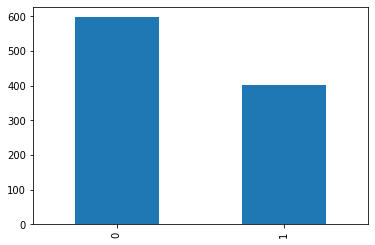

In [5]:
# Creating y and printing the shape of it
y = ns4b.iloc[:, 0].values
ns4b["Disease"].value_counts().sort_index().plot.bar()

# clearing the memory
del ns4b

In [6]:
# Creating the Bag of Words model using CountVectorizer()
# This is equivalent to k-mer counting
# The n-gram size of 4 was previously determined by testing
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
x = cv.fit_transform(ns4b_texts)

# clearing the memory
del cv

In [7]:
# Splitting the human dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42, stratify=y)

# Printing the shapes of the train and test matrices
print("The shape of x_train is:", X_train.shape)
print("The shape of y_train is:", y_train.shape)
print("The shape of x_test is:", X_test.shape)
print("The shape of y_test is:", y_test.shape)

# clearing the memory
del x
del y

The shape of x_train is: (799, 4079)
The shape of y_train is: (799,)
The shape of x_test is: (200, 4079)
The shape of y_test is: (200,)


## Keras

In [8]:
# Importing the Keras libraries
from keras.models import Sequential
from keras.layers import Dense

# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=4079, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the keras model on the dataset
model.fit(X_train, y_train, epochs = 150, batch_size = 32)

Using TensorFlow backend.
W0323 16:54:36.659879 139910218475328 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0323 16:54:36.680430 139910218475328 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0323 16:54:36.682374 139910218475328 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0323 16:54:36.733269 139910218475328 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0323 16:54:36.758321 13991021

Epoch 1/150
799/799 [==============================] - 0s 524us/step - loss: 0.6274 - acc: 0.5920
Epoch 2/150
799/799 [==============================] - 0s 97us/step - loss: 0.6141 - acc: 0.6133
Epoch 3/150
799/799 [==============================] - 0s 101us/step - loss: 0.6187 - acc: 0.5970
Epoch 4/150
799/799 [==============================] - 0s 102us/step - loss: 0.5882 - acc: 0.6383
Epoch 5/150
799/799 [==============================] - 0s 97us/step - loss: 0.6009 - acc: 0.6033
Epoch 6/150
799/799 [==============================] - 0s 100us/step - loss: 0.5937 - acc: 0.6370
Epoch 7/150
799/799 [==============================] - 0s 101us/step - loss: 0.5876 - acc: 0.6245
Epoch 8/150
799/799 [==============================] - 0s 98us/step - loss: 0.5744 - acc: 0.6596
Epoch 9/150
799/799 [==============================] - 0s 116us/step - loss: 0.5698 - acc: 0.6621
Epoch 10/150
799/799 [==============================] - 0s 106us/step - loss: 0.5632 - acc: 0.6746
Epoch 11/150
799/799 [

799/799 [==============================] - 0s 209us/step - loss: 0.4752 - acc: 0.7109
Epoch 84/150
799/799 [==============================] - 0s 193us/step - loss: 0.4677 - acc: 0.7196
Epoch 85/150
799/799 [==============================] - 0s 193us/step - loss: 0.4787 - acc: 0.7272
Epoch 86/150
799/799 [==============================] - 0s 173us/step - loss: 0.4846 - acc: 0.7171
Epoch 87/150
799/799 [==============================] - 0s 176us/step - loss: 0.4585 - acc: 0.7309
Epoch 88/150
799/799 [==============================] - 0s 165us/step - loss: 0.4636 - acc: 0.7422
Epoch 89/150
799/799 [==============================] - 0s 180us/step - loss: 0.4836 - acc: 0.7059
Epoch 90/150
799/799 [==============================] - 0s 167us/step - loss: 0.4605 - acc: 0.7397
Epoch 91/150
799/799 [==============================] - 0s 186us/step - loss: 0.4563 - acc: 0.7409
Epoch 92/150
799/799 [==============================] - 0s 163us/step - loss: 0.4724 - acc: 0.7084
Epoch 93/150
799/799 [=

In [9]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

# clearing the memory
del accuracy
del model
del X_train
del X_test
del y_train
del y_test

200/200 [==============================] - 0s 499us/step
Accuracy: 63.50
